In [3]:
#import base stuff
import numpy as np
import random
from keras.preprocessing.image import load_img, img_to_array

# Get List of Layers
## [1:] Python list syntax slices this list from the second element to the end, effectively skipping the first layer

In [4]:
from keras.models import load_model
model = load_model("./models/perspectiveClassifier.keras")

#Overview of Model

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# Get List of Layers
## [1:] Python list syntax slices this list from the second element to the end, effectively skipping the first layer

In [6]:
layer_outputs = [layer.output for layer in model.layers]
layer_names =[layer.name for layer in model.layers]
print(layer_outputs)

[<KerasTensor: shape=(None, 254, 254, 16) dtype=float32 (created by layer 'conv2d')>, <KerasTensor: shape=(None, 127, 127, 16) dtype=float32 (created by layer 'max_pooling2d')>, <KerasTensor: shape=(None, 125, 125, 32) dtype=float32 (created by layer 'conv2d_1')>, <KerasTensor: shape=(None, 62, 62, 32) dtype=float32 (created by layer 'max_pooling2d_1')>, <KerasTensor: shape=(None, 60, 60, 16) dtype=float32 (created by layer 'conv2d_2')>, <KerasTensor: shape=(None, 30, 30, 16) dtype=float32 (created by layer 'max_pooling2d_2')>, <KerasTensor: shape=(None, 14400) dtype=float32 (created by layer 'flatten')>, <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>]


# Create Visualization model

In [7]:
from keras.models import Model
vModel = Model(inputs= model.input, outputs = layer_outputs)

## load image

In [8]:
img = load_img('Img_test.jpg',target_size=(256,256))
#get array from image
x = img_to_array(img)
#brief overview of array
x.shape

(256, 256, 3)

In [9]:
# reshape to predict only one image
x=x.reshape(1,256,256,3)
#rescale
x = x/255

### Get layer feature maps for image

In [10]:
feature_maps = vModel.predict(x)

1/1 [==============================] - 0s 289ms/step


In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(1, 254, 254, 16)
(1, 127, 127, 16)
(1, 125, 125, 32)
(1, 62, 62, 32)
(1, 60, 60, 16)


C:\Users\Christoph\AppData\Local\Temp\ipykernel_2168\2057423474.py:29: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
C:\Users\Christoph\AppData\Local\Temp\ipykernel_2168\2057423474.py:40: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


(1, 30, 30, 16)
(1, 14400)
(1, 256)
(1, 1)


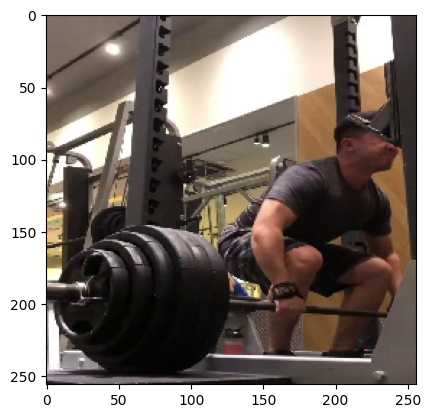

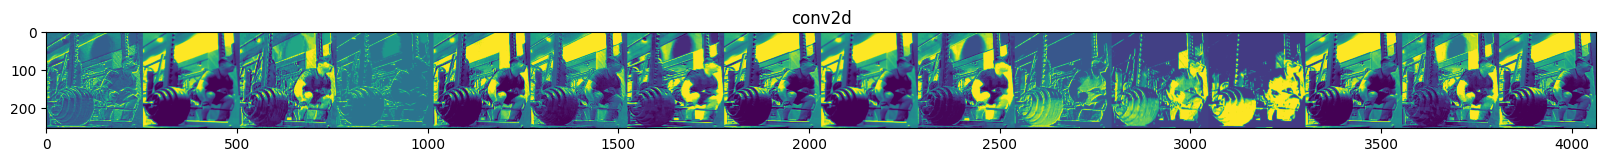

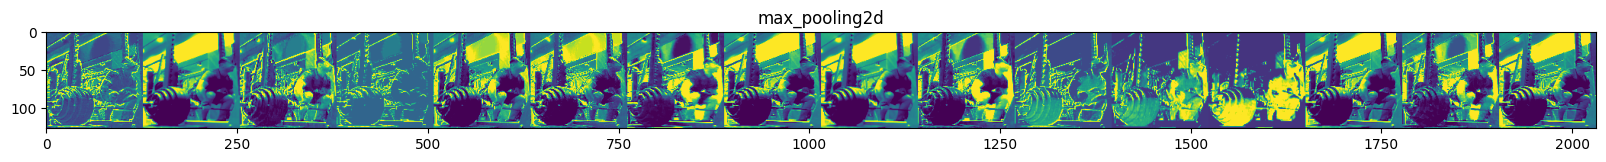

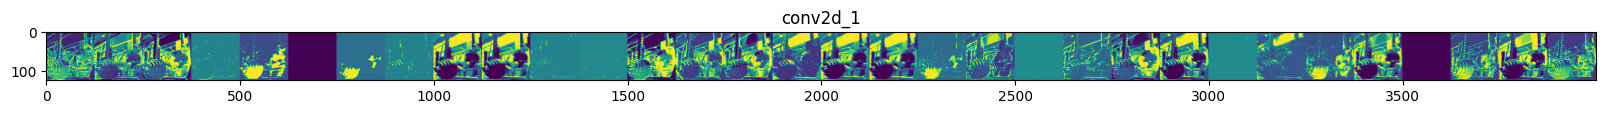

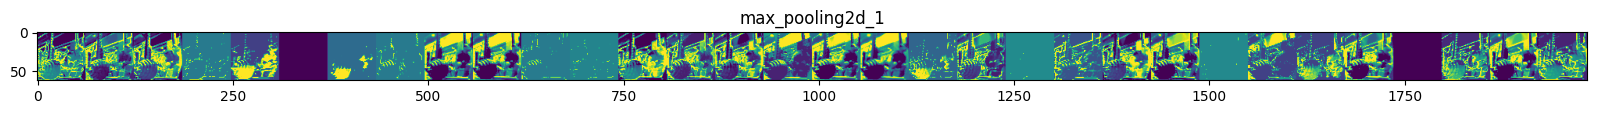

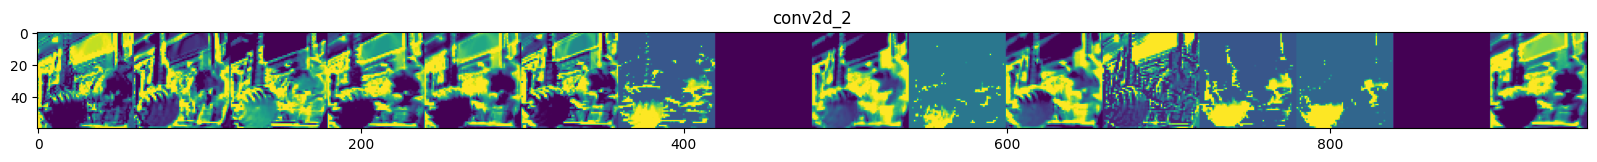

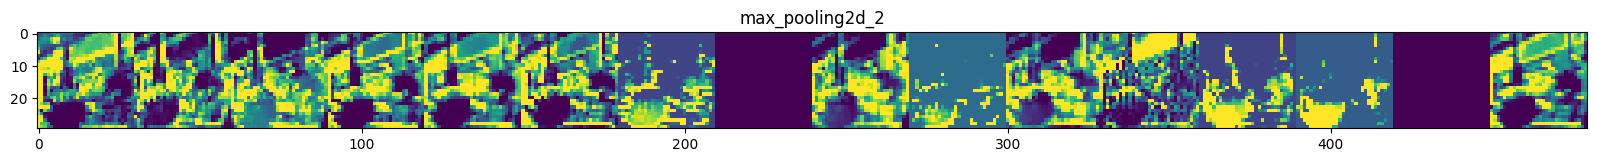

In [12]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(img)
# Loop over each layer name and its corresponding feature maps
for layer_name, feature_map in zip(layer_names, feature_maps):
    print(feature_map.shape)  # Print the shape of the feature maps for the current layer

    # Check if the feature map is 4-dimensional (e.g., includes dimensions for batch size, width, height, channels)
    if len(feature_map.shape) == 4:
        
        # Get the number of channels (or filters) in the feature map
        channels = feature_map.shape[-1]  # The last dimension in the shape of the feature map

        # Get the spatial dimensions (height or width) of the feature map
        size = feature_map.shape[1]  # Assumes the height and width are equal

        # Initialize a grid to display all the channels side by side
        display_grid = np.zeros((size, size * channels))

        # Loop over each channel in the feature map
        for i in range(channels):
            x = feature_map[0, :, :, i]  # Extract the ith channel's data (for the first image if batch size > 1)

            # Normalize the channel data to have a mean of 0
            x -= x.mean()
            
            # Normalize the channel data to have a standard deviation of 1
            x /= x.std()

            # Scale the normalized data (increase the contrast)
            # Increasing this scale value will enhance the contrast of the visualized feature map
            x *= 128  

            # Offset the scaled data to avoid negative values
            # Modifying this value shifts the range of the pixel values; be cautious to keep within [0, 255]
            x += 128  

            # Clip the values to be in the range [0, 255] for valid image display
            x = np.clip(x, 0, 255).astype('uint8')

            # Place the channel's data in the corresponding part of the display grid
            display_grid[:, i * size: (i + 1) * size] = x
        
        # Define the scale of the plot. Adjusting this value changes the size of the displayed figure
        scale = 20. / channels  

        # Create a figure with the specified size
        plt.figure(figsize=(scale * channels, scale))

        # Set the title of the plot to be the layer's name
        plt.title(layer_name)

        # Turn off the grid for the plot
        plt.grid(False)

        # Display the grid of feature maps for this layer
        plt.imshow(display_grid, aspect='auto', cmap='viridis')


# Visualize each Feature Map with the Filter that produced it
## The filter is run over all previous feature maps and the results are added up

(1, 254, 254, 16)


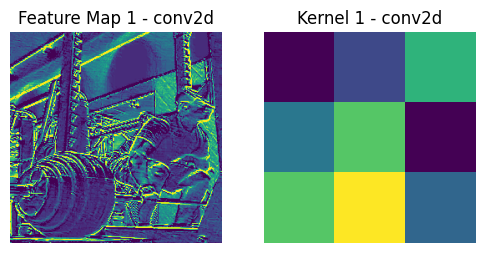

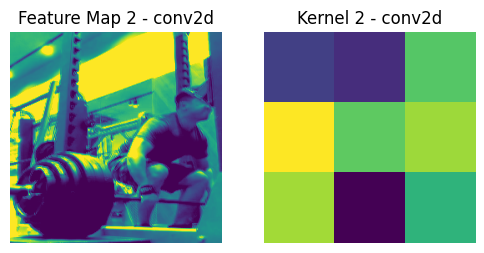

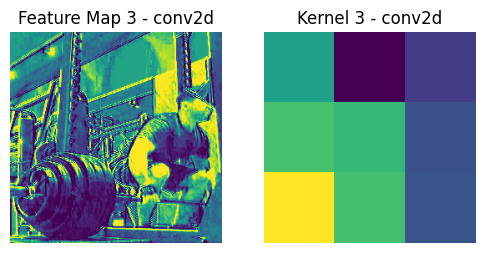

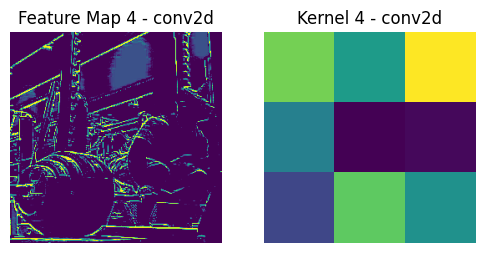

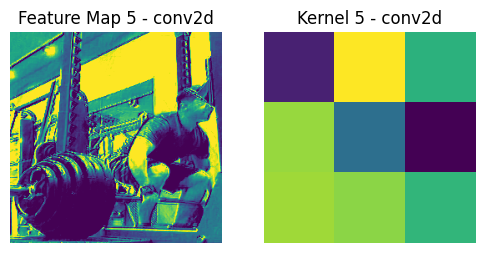

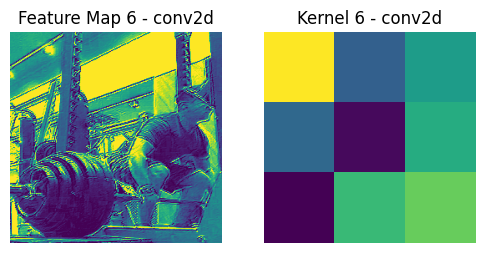

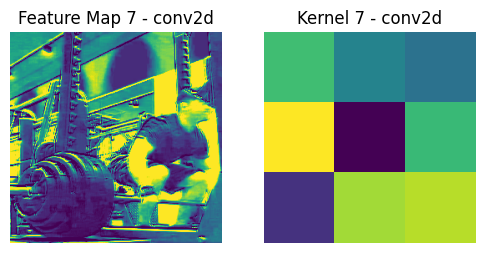

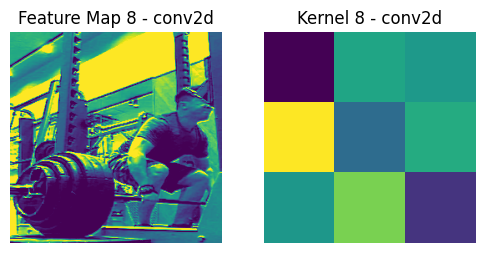

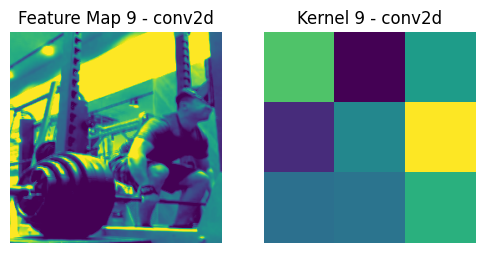

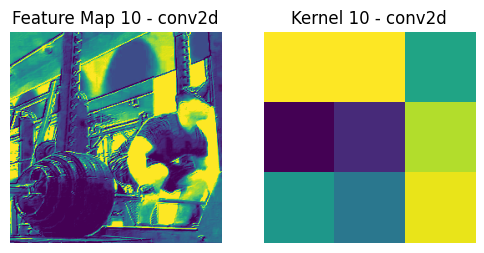

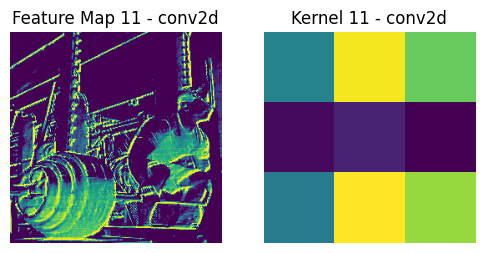

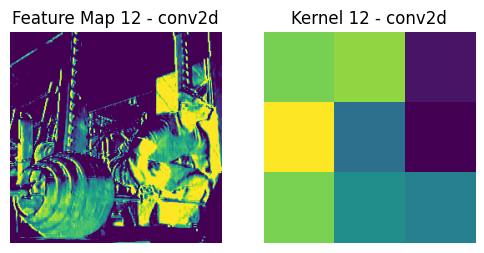

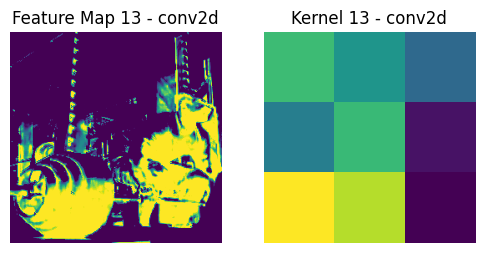

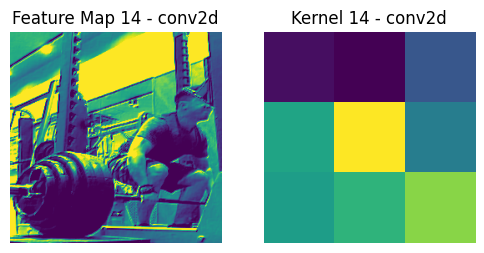

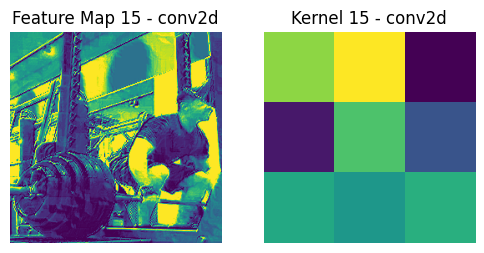

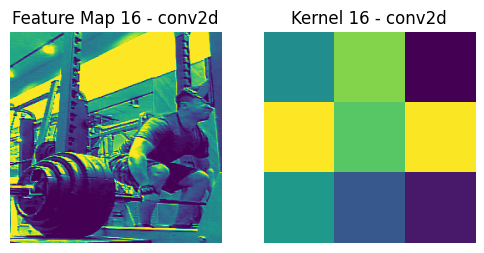

(1, 127, 127, 16)
(1, 125, 125, 32)


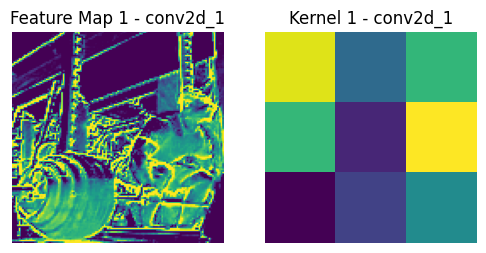

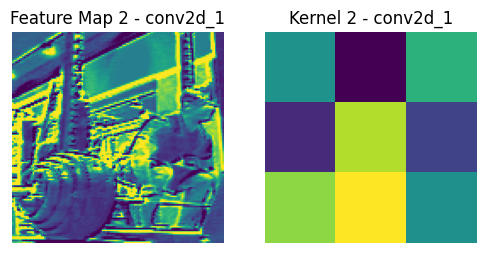

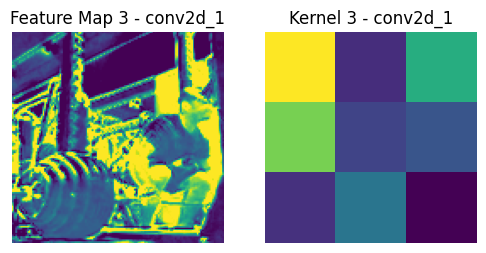

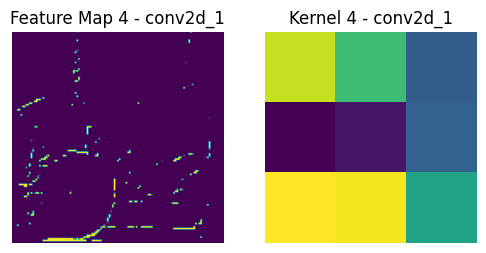

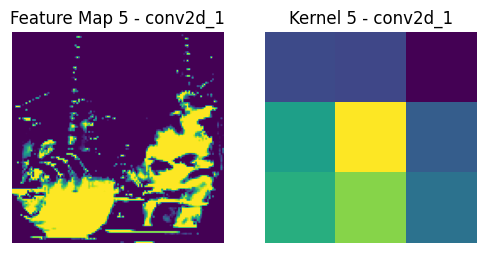

C:\Users\Christoph\AppData\Local\Temp\ipykernel_2168\733588036.py:27: RuntimeWarning: invalid value encountered in cast
  fmap = np.clip(fmap, 0, 255).astype('uint8')


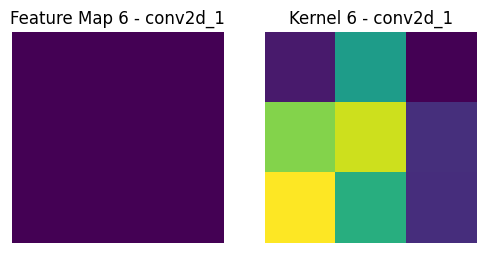

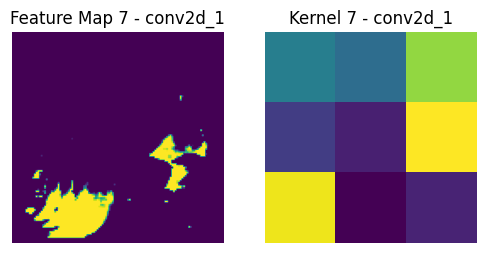

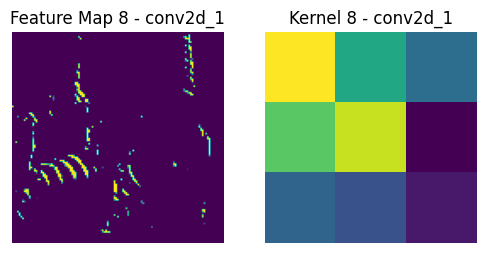

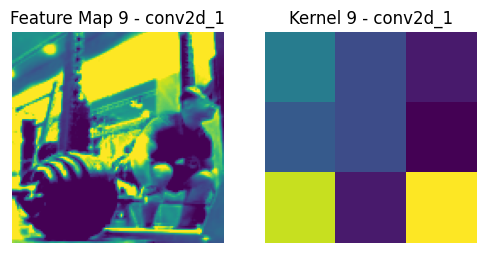

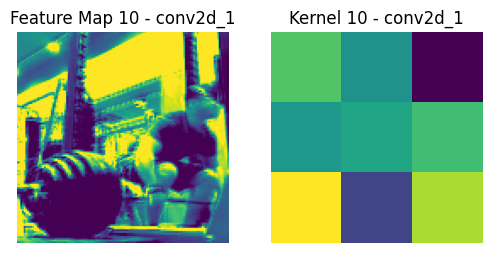

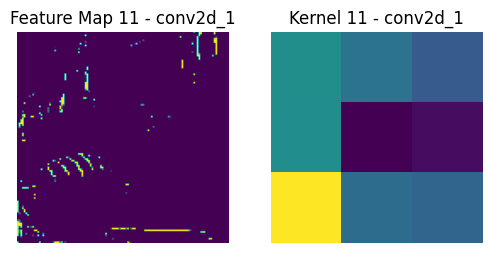

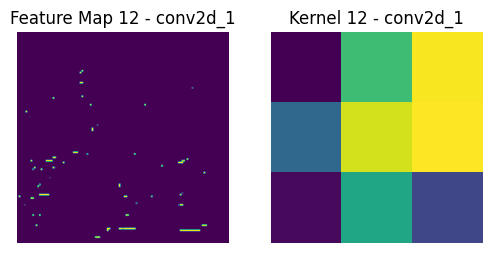

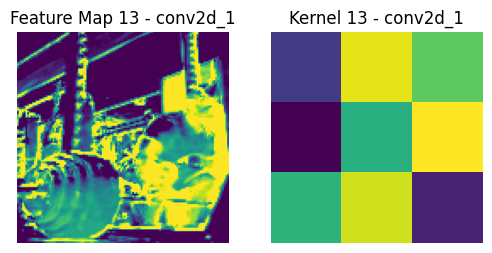

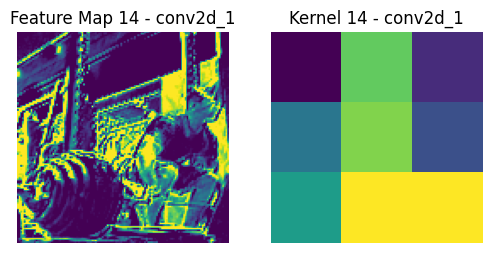

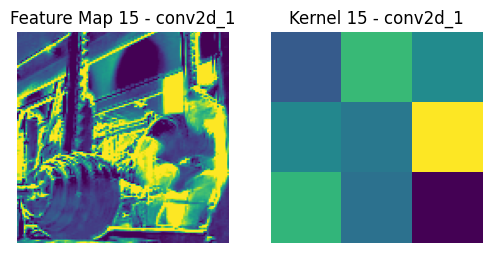

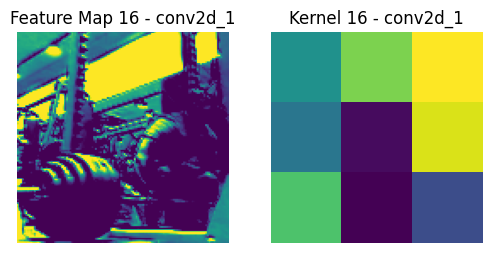

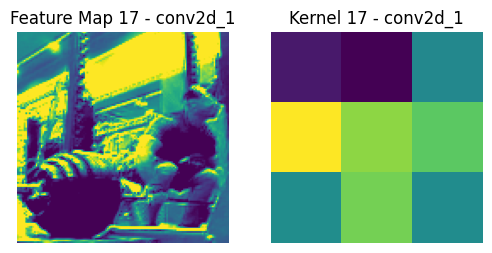

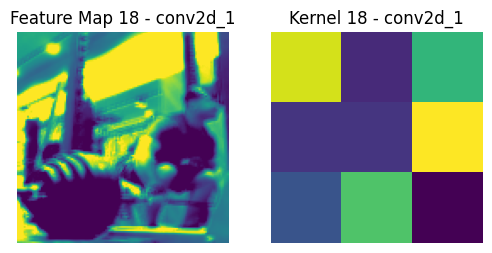

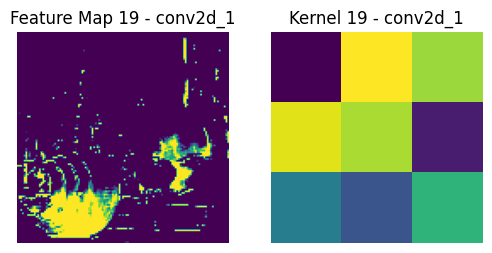

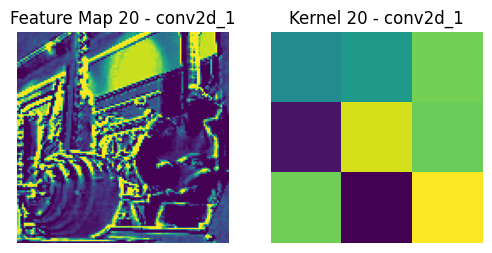

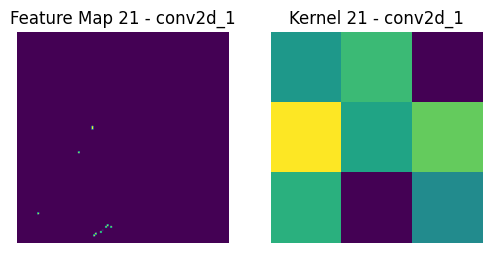

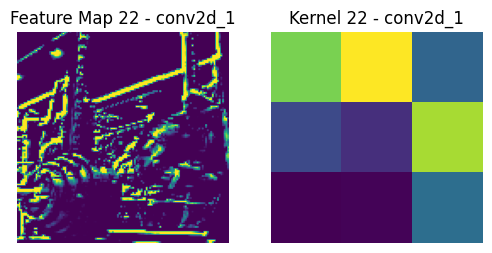

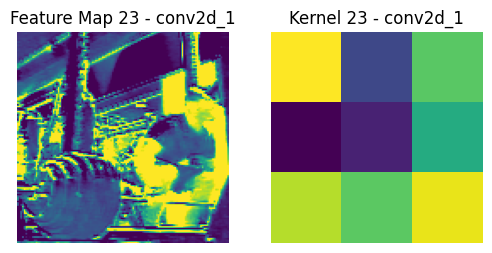

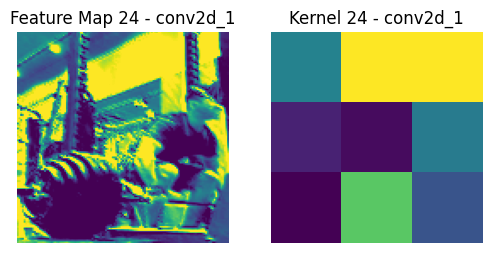

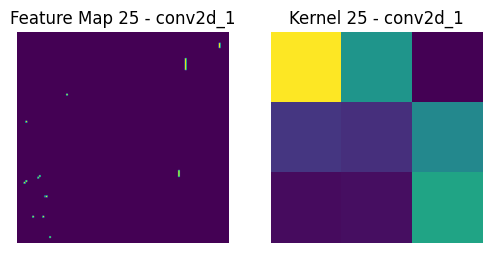

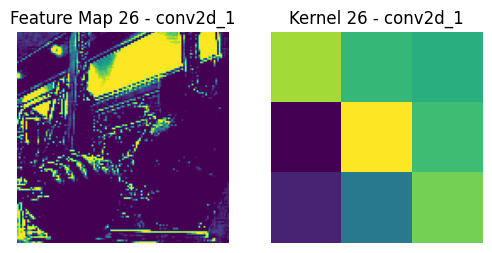

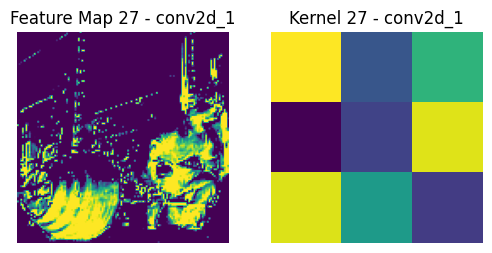

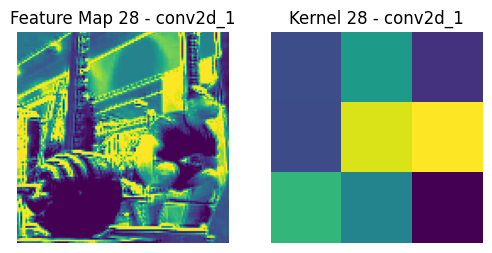

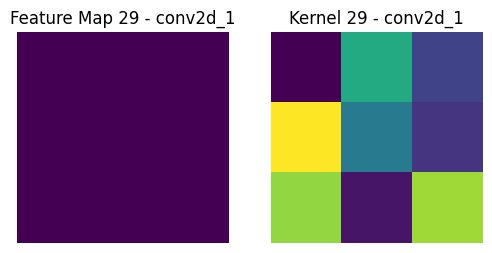

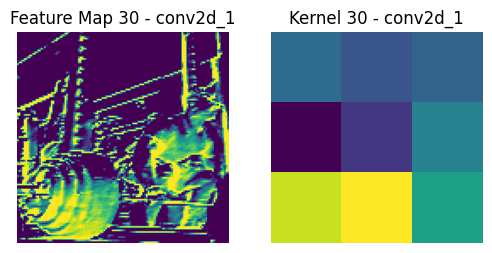

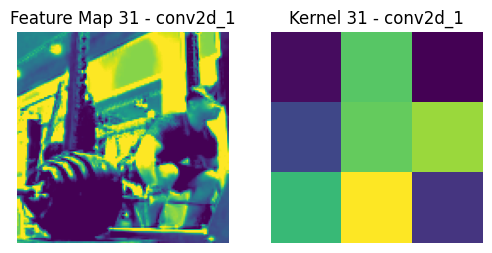

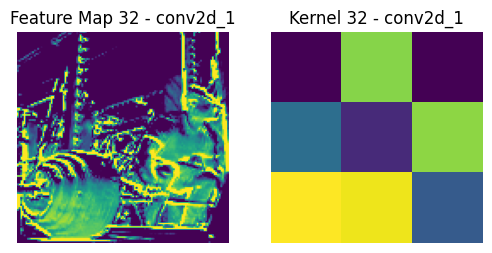

(1, 62, 62, 32)
(1, 60, 60, 16)


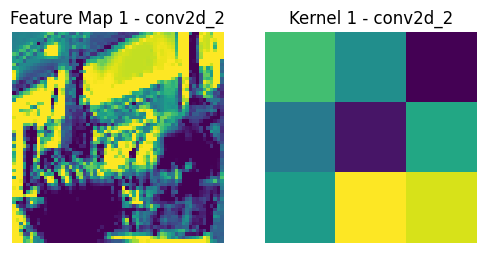

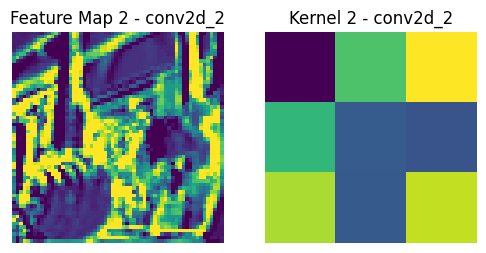

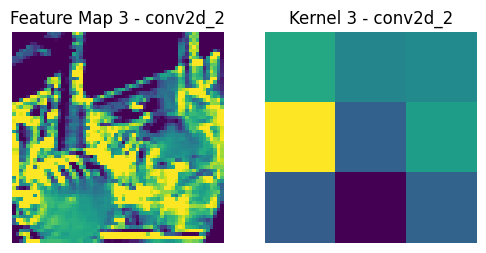

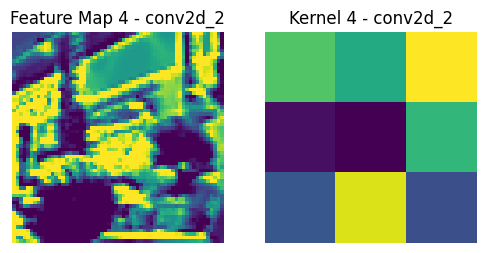

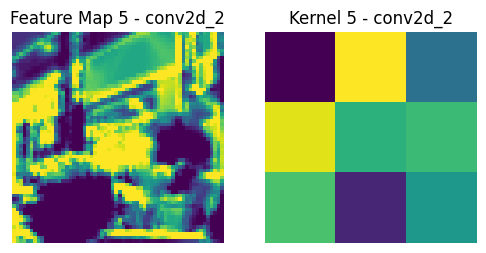

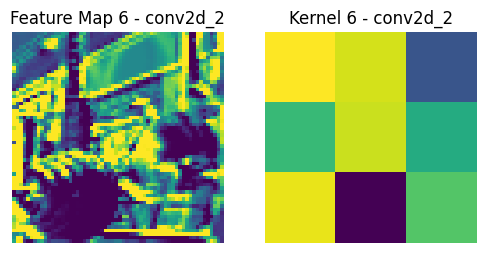

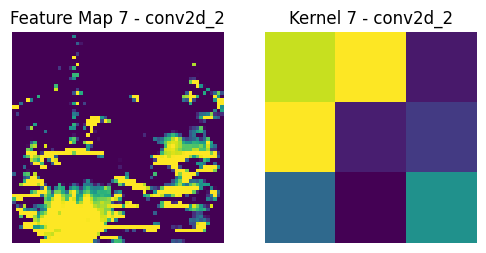

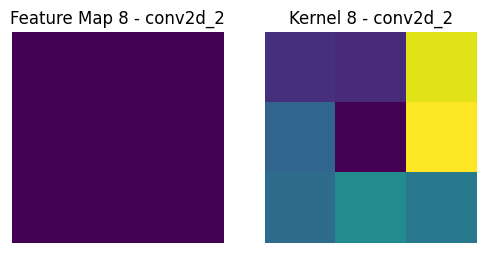

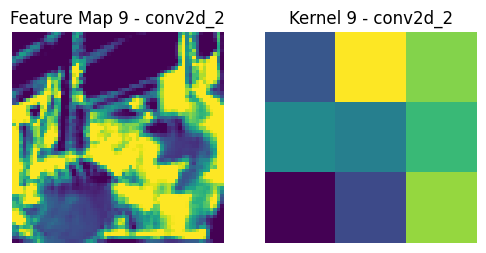

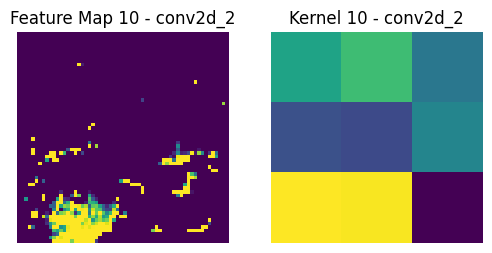

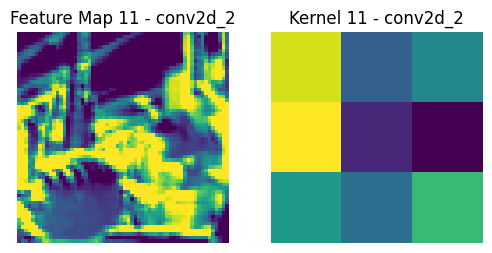

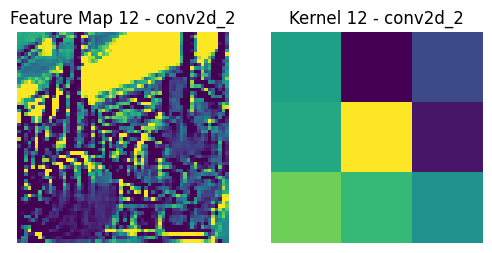

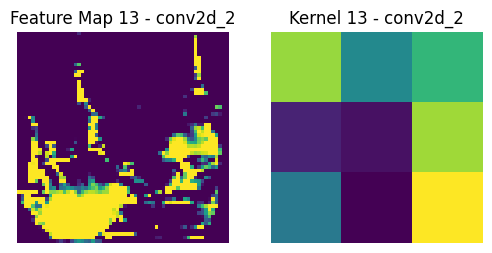

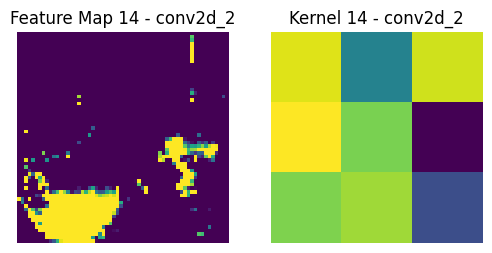

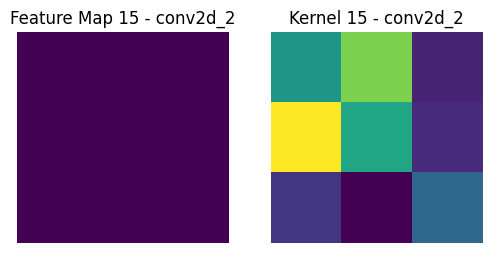

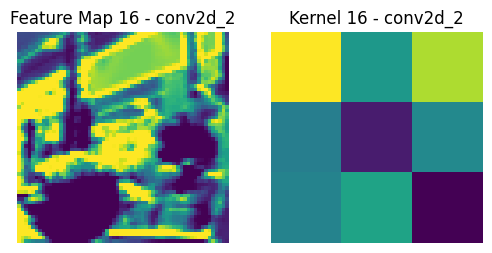

(1, 30, 30, 16)
(1, 14400)
(1, 256)
(1, 1)


In [13]:


# Loop over each layer name and its corresponding feature maps
for layer_name, feature_map in zip(layer_names, feature_maps):
    print(feature_map.shape)  # Print the shape of the feature maps for the current layer

    # Check if the layer is a convolutional layer
    if 'conv' in layer_name:
        conv_layer = model.get_layer(layer_name)
        kernels, biases = conv_layer.get_weights()

        # Get the number of channels (or filters) in the feature map
        channels = feature_map.shape[-1]

        # Get the spatial dimensions (height or width) of the feature map
        size = feature_map.shape[1]

        # Loop over each channel in the feature map
        for i in range(channels):
            # Extract the ith channel's data
            fmap = feature_map[0, :, :, i]
            kernel = kernels[:, :, :, i]

            # Normalize the feature map for better visualization
            fmap -= fmap.mean()
            fmap /= fmap.std()
            fmap *= 128
            fmap += 128
            fmap = np.clip(fmap, 0, 255).astype('uint8')

            # Plotting the feature map
            plt.figure(figsize=(6, 3))
            
            # Display the feature map
            plt.subplot(1, 2, 1)
            plt.imshow(fmap, cmap='viridis')
            plt.title(f'Feature Map {i+1} - {layer_name}')
            plt.axis('off')

            # Display the corresponding kernel
            plt.subplot(1, 2, 2)
            # Assuming single input channel for simplicity; modify if more channels
            plt.imshow(kernel[:, :, 0], cmap='viridis')
            plt.title(f'Kernel {i+1} - {layer_name}')
            plt.axis('off')

            plt.show()

(1, 254, 254, 16)


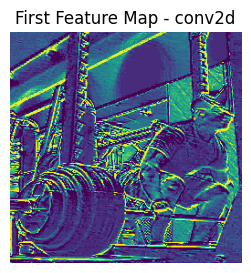

(1, 127, 127, 16)


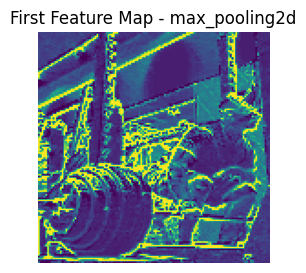

(1, 125, 125, 32)


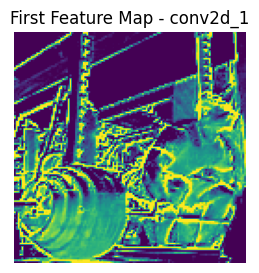

(1, 62, 62, 32)


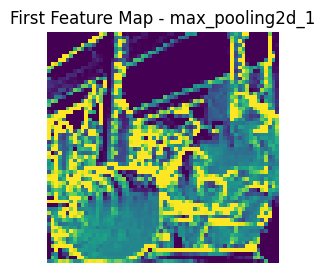

(1, 60, 60, 16)


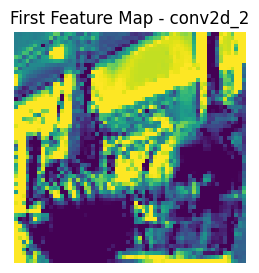

(1, 30, 30, 16)


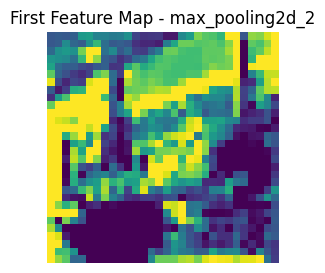

(1, 14400)
(1, 256)
(1, 1)


In [14]:
import matplotlib.pyplot as plt

# Loop over each layer name and its corresponding feature maps
for layer_name, feature_map in zip(layer_names, feature_maps):
    print(feature_map.shape)  # Print the shape of the feature maps for the current layer

    # Check if the feature map is 4-dimensional
    if len(feature_map.shape) == 4:
        # Extract the first feature map
        fmap = feature_map[0, :, :, 0]

        # Normalize the feature map for better visualization
        fmap -= fmap.mean()
        fmap /= fmap.std()
        fmap *= 128
        fmap += 128
        fmap = np.clip(fmap, 0, 255).astype('uint8')

        # Plotting the feature map
        plt.figure(figsize=(6, 3))
        plt.imshow(fmap, cmap='viridis')
        plt.title(f'First Feature Map - {layer_name}')
        plt.axis('off')
        plt.show()
